In [208]:
library(dplyr)
library(ggplot2)

In [90]:
# install.packages("car")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [209]:
library(car)

In [210]:
jajo <- read.table(file="jajo.csv", sep=";", header=TRUE)

In [211]:
head(jajo)

,Day,Time.hh.mm.ss.,Temp1.C.,Temp2.C.,Temp3.C.,Temp4.C.,Humidity...
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,06-06-2019,07:43:52,"32,20","31,60","37,00","37,90","68,00"
2,06-06-2019,07:48:52,"32,10","31,40","35,30","37,30","67,00"
3,06-06-2019,07:53:52,"32,40","30,90","34,80","37,50","71,00"
4,06-06-2019,07:58:52,"32,50","30,80","34,80","37,50","71,00"
5,06-06-2019,08:03:52,"32,70","31,10","34,60","37,30","70,00"
6,06-06-2019,08:08:52,"32,60","30,90","34,70","37,30","68,00"


In [212]:
# Konwersja przecinków na kropki w kolumnach z temperaturą
jajo[, c("Temp1.C.", "Temp2.C.", "Temp3.C.", "Temp4.C.")] <- lapply(jajo[, c("Temp1.C.", "Temp2.C.", "Temp3.C.", "Temp4.C.")], function(x) as.numeric(gsub(",", ".", x)))
# Konwersja wartości wilgotności: zamiana przecinka na kropkę i konwersja na format liczbowy
jajo$Humidity... <- as.numeric(gsub(",", ".", jajo$Humidity...))
# Zmiana nazwy Humidity... na Humidity
names(jajo)[names(jajo) == "Humidity..."] <- "Humidity"

In [213]:
head(jajo)

,Day,Time.hh.mm.ss.,Temp1.C.,Temp2.C.,Temp3.C.,Temp4.C.,Humidity
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,06-06-2019,07:43:52,32.2,31.6,37.0,37.9,68
2,06-06-2019,07:48:52,32.1,31.4,35.3,37.3,67
3,06-06-2019,07:53:52,32.4,30.9,34.8,37.5,71
4,06-06-2019,07:58:52,32.5,30.8,34.8,37.5,71
5,06-06-2019,08:03:52,32.7,31.1,34.6,37.3,70
6,06-06-2019,08:08:52,32.6,30.9,34.7,37.3,68


In [214]:
str(jajo)

'data.frame':	1596 obs. of  7 variables:
 $ Day           : chr  "06-06-2019" "06-06-2019" "06-06-2019" "06-06-2019" ...
 $ Time.hh.mm.ss.: chr  "07:43:52" "07:48:52" "07:53:52" "07:58:52" ...
 $ Temp1.C.      : num  32.2 32.1 32.4 32.5 32.7 32.6 32.6 32.6 32.5 33.8 ...
 $ Temp2.C.      : num  31.6 31.4 30.9 30.8 31.1 30.9 30.7 30.7 30.6 30.9 ...
 $ Temp3.C.      : num  37 35.3 34.8 34.8 34.6 34.7 34.6 34.6 34.6 34 ...
 $ Temp4.C.      : num  37.9 37.3 37.5 37.5 37.3 37.3 37.2 37.2 37.2 37.9 ...
 $ Humidity      : num  68 67 71 71 70 68 68 68 68 68 ...


# ZAD 1 - Podaj jaka była dzienna temperatura inkubacji? Średnia + SD


In [215]:
# Obliczenie średniej temperatury dla każdego dnia
# Używamy funkcji aggregate() do obliczenia średniej wartości każdej temperatury dla każdego dnia.
srednie_temp <- aggregate(. ~ Day, data = jajo[, c("Day", "Temp1.C.", "Temp2.C.", "Temp3.C.", "Temp4.C.")], FUN = mean)

# Dodanie nowej kolumny 'Avg_Temp', która będzie zawierała średnią z wszystkich temperatur dla danego dnia.
srednie_temp$Avg_Temp <- rowMeans(srednie_temp[, c("Temp1.C.", "Temp2.C.", "Temp3.C.", "Temp4.C.")])

In [216]:
srednie_temp

Day,Temp1.C.,Temp2.C.,Temp3.C.,Temp4.C.,Avg_Temp
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
06-06-2019,35.55638,35.29060,34.38054,34.30872,34.88406
07-06-2019,35.80222,34.61333,34.61289,35.85289,35.22033
08-06-2019,36.15887,35.75927,35.18831,35.40927,35.62893
09-06-2019,35.91535,35.85270,35.93693,36.06058,35.94139
10-06-2019,36.24016,35.01967,34.95451,36.40984,35.65605
11-06-2019,37.01407,35.68251,35.03156,36.67148,36.09990
12-06-2019,35.41327,35.78407,37.32434,36.93584,36.36438


In [217]:
# Obliczenie średniego odchylenia standardowego dla każdego dnia
# Używamy funkcji aggregate() do obliczenia odchylenia standardowego dla każdej temperatury dla każdego dnia.
odchylenia_temp <- aggregate(. ~ Day, data = jajo[, c("Day", "Temp1.C.", "Temp2.C.", "Temp3.C.", "Temp4.C.")], FUN = sd)

# Dodanie nowej kolumny 'Avg_SD', która będzie zawierała średnie odchylenie standardowe dla danego dnia.
odchylenia_temp$Avg_SD <- rowMeans(odchylenia_temp[, c("Temp1.C.", "Temp2.C.", "Temp3.C.", "Temp4.C.")])

In [218]:
odchylenia_temp

Day,Temp1.C.,Temp2.C.,Temp3.C.,Temp4.C.,Avg_SD
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
06-06-2019,1.765561,2.431170,2.188906,2.373016,2.189663
07-06-2019,2.041499,1.868082,2.127785,2.155579,2.048236
08-06-2019,1.774174,1.865105,1.975084,2.194536,1.952225
09-06-2019,1.717160,1.979184,1.785802,2.213571,1.923929
10-06-2019,2.465721,2.147432,2.245567,1.165549,2.006067
11-06-2019,1.240872,1.154942,2.777381,1.969768,1.785741
12-06-2019,1.321313,1.524704,1.345967,1.466666,1.414663


In [103]:
# WYKRESY
srednie_temp$Day <- as.Date(srednie_temp$Day, format="%d-%m-%Y")
wykres <- ggplot(data = srednie_temp, aes(x = Day, y = Avg_Temp)) +
  geom_point() +
  labs(title = "Średnia temperatura dla poszczególnych dni",
       x = "Dzień",
       y = "Średnia temperatura (°C)") +
  theme_minimal() +
  scale_x_date(date_labels = "%d-%m-%Y", date_breaks = "1 day")

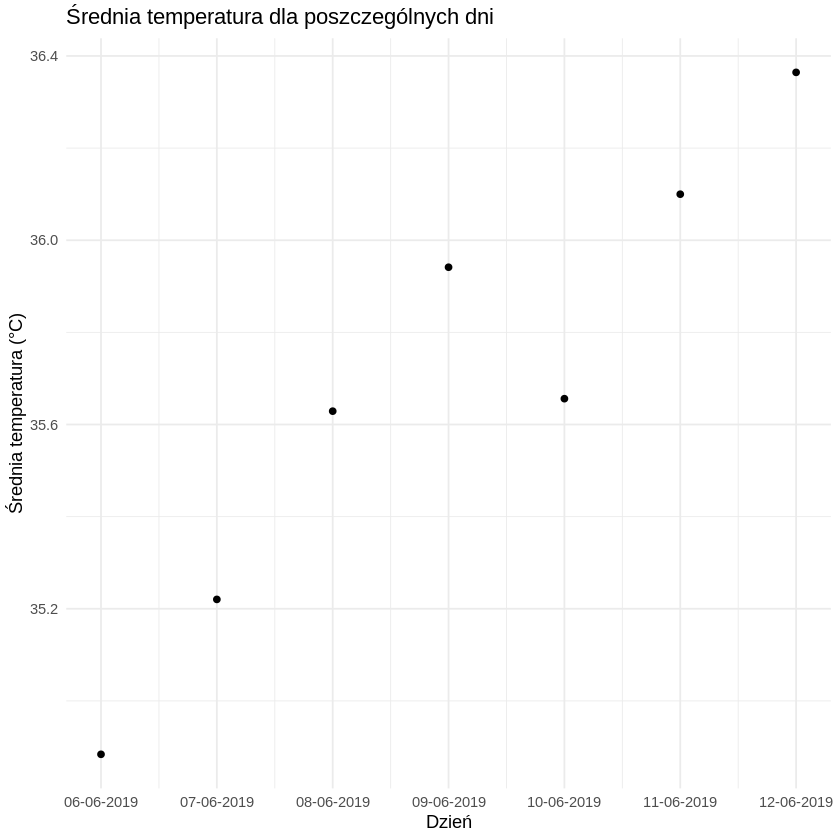

In [104]:
wykres

In [105]:
odchylenia_temp$Day <- as.Date(odchylenia_temp$Day, format="%d-%m-%Y")
wykres_odch <- ggplot(data = odchylenia_temp, aes(x = Day, y = Avg_SD)) +
  geom_point() +
  labs(title = "Odchylenie standardowe dla poszczególnych dni",
       x = "Dzień",
       y = "Odchylenie standardowe") +
  theme_minimal() +
  scale_x_date(date_labels = "%d-%m-%Y", date_breaks = "1 day")

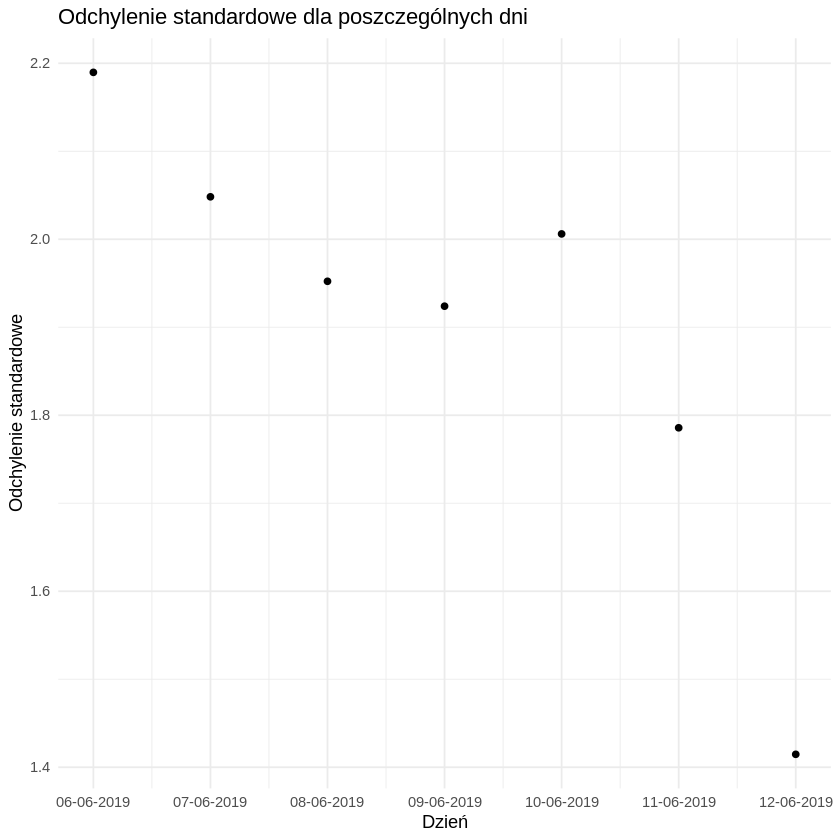

In [106]:
wykres_odch

# ZAD 2 - Jaka była minimalna i maksymalna temperatura inkubacji?

In [221]:
# Znalezienie minimalnej temperatury dla każdego dnia
# Używamy funkcji aggregate() do znalezienia minimalnej wartości temperatury dla każdego dnia.
min_temp <- aggregate(. ~ Day, data = jajo[, c("Day", "Temp1.C.", "Temp2.C.", "Temp3.C.", "Temp4.C.")], FUN = min)
# Dodanie nowych kolumn do ramki danych min_temp
min_temp$Min_Temp <- apply(min_temp[, -1], 1, min)

In [222]:
min_temp

Day,Temp1.C.,Temp2.C.,Temp3.C.,Temp4.C.,Min_Temp
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
06-06-2019,32.1,30.6,30.8,30.2,30.2
07-06-2019,31.0,31.5,30.5,32.2,30.5
08-06-2019,32.7,31.1,31.2,29.6,29.6
09-06-2019,31.8,29.1,28.6,28.2,28.2
10-06-2019,31.2,31.5,31.3,31.9,31.2
11-06-2019,34.1,34.1,30.8,30.9,30.8
12-06-2019,33.3,32.6,33.7,33.4,32.6


In [226]:
# Znalezienie maksymalnej temperatury dla każdego dnia
# Używamy funkcji aggregate() do znalezienia maksymalnej wartości temperatury dla każdego dnia.
max_temp <- aggregate(. ~ Day, data = jajo[, c("Day", "Temp1.C.", "Temp2.C.", "Temp3.C.", "Temp4.C.")], FUN = max)

# Dodanie nowych kolumn do ramki danych max_temp
# Wykorzystujemy funkcję apply(), aby obliczyć maksymalną wartość dla każdego wiersza ramki danych.
max_temp$Max_Temp <- apply(max_temp[, -1], 1, max)

In [227]:
max_temp

Day,Temp1.C.,Temp2.C.,Temp3.C.,Temp4.C.,Max_Temp
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
06-06-2019,38.5,38.4,38.3,38.6,38.6
07-06-2019,38.7,38.3,37.9,39.0,39.0
08-06-2019,38.9,38.8,38.4,38.7,38.9
09-06-2019,39.1,38.8,39.0,38.8,39.1
10-06-2019,38.8,38.8,38.4,39.0,39.0
11-06-2019,38.9,38.7,39.0,39.5,39.5
12-06-2019,39.0,39.1,39.1,39.0,39.1


In [114]:
# Tworzenie wykresu dla minimalnych temperatur
min_plot <- ggplot(min_temp, aes(x = Day, y = Min_Temp)) +
  geom_line(color = "blue") +
  geom_point(color = "blue") +
  labs(title = "Minimalna temperatura dla każdego dnia",
       x = "Dzień",
       y = "Minimalna temperatura (°C)") +
  theme_minimal()

`geom_line()`: Each group consists of only one observation.
ℹ Do you need to adjust the group aesthetic?


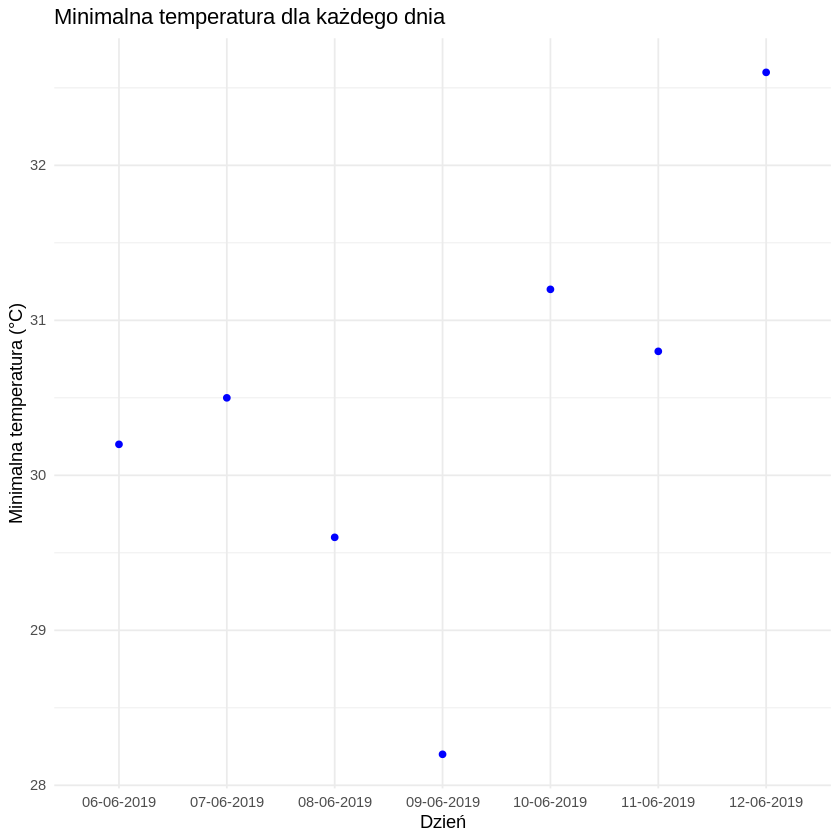

In [115]:
min_plot

In [116]:
# Tworzenie wykresu dla maksymalnych temperatur
max_plot <- ggplot(max_temp, aes(x = Day, y = Max_Temp)) +
  geom_line(color = "red") +
  geom_point(color = "red") +
  labs(title = "Maksymalna temperatura dla każdego dnia",
       x = "Dzień",
       y = "Maksymalna temperatura (°C)") +
  theme_minimal()

`geom_line()`: Each group consists of only one observation.
ℹ Do you need to adjust the group aesthetic?


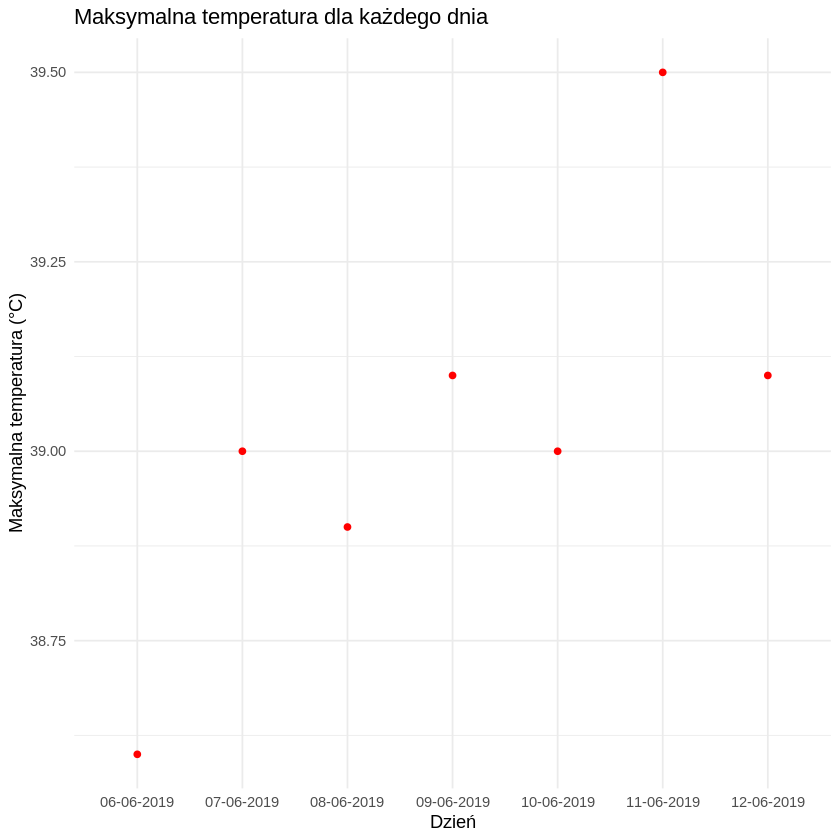

In [117]:
max_plot

# ZAD 3 - Jaka była różnica temperatur zarejestrowana przez czujniki w danym pomiarze? (pomiar o tej samej godzinie i dniu) Średnia + SD


In [228]:
# Obliczenie różnicy między maksymalną a minimalną temperaturą dla każdego dnia
roznica_temp <- max_temp$Max_Temp - min_temp$Min_Temp
roznica_temp

[1]  8.4  8.5  9.3 10.9  7.8  8.7  6.5

In [229]:
# Obliczenie średniej różnicy między maksymalną a minimalną temperaturą
srednia_roznic_temp <- mean(roznica_temp)
srednia_roznic_temp

[1] 8.585714

In [230]:
# Obliczenie odchylenia standardowego dla różnic między maksymalną a minimalną temperaturą
odchylenie_roznic <- sd(roznica_temp)
odchylenie_roznic

[1] 1.347131

# Czy temperatura zmieniała się na przestrzeni dni? *


In [231]:
# Test normalności Shapiro-Wilk dla zmiennej Temp1.C.
shapiro.test(jajo$Temp1.C.)

# Test normalności Shapiro-Wilk dla zmiennej Temp2.C.
shapiro.test(jajo$Temp2.C.)

# Test normalności Shapiro-Wilk dla zmiennej Temp3.C.
shapiro.test(jajo$Temp3.C.)

# Test normalności Shapiro-Wilk dla zmiennej Temp4.C.
shapiro.test(jajo$Temp4.C.)


	Shapiro-Wilk normality test

data:  jajo$Temp1.C.
W = 0.94743, p-value < 2.2e-16



	Shapiro-Wilk normality test

data:  jajo$Temp2.C.
W = 0.96971, p-value < 2.2e-16



	Shapiro-Wilk normality test

data:  jajo$Temp3.C.
W = 0.94375, p-value < 2.2e-16



	Shapiro-Wilk normality test

data:  jajo$Temp4.C.
W = 0.95427, p-value < 2.2e-16


przyjmujemy, że mamy alfe 0.05, czyli p-value < 0.05 => odrzucamy H0 na rzecz H1, czyli dane nie pochodzą z rozkładu normalnego


czyyyli, korzystamy z tego drugiego testu

Hipoteza zerowa (H0): Średnie temperatury nie różnią się istotnie pomiędzy poszczególnymi dniami.

Hipoteza alternatywna (H1): Co najmniej jedna z grup dni ma istotnie różne średnie temperatury od pozostałych dni.

In [232]:
# Test Kruskala-Wallisa dla zmiennej Temp1.C. w zależności od dnia
kruskal.test(Temp1.C. ~ Day, data = jajo)

# Test Kruskala-Wallisa dla zmiennej Temp2.C. w zależności od dnia
kruskal.test(Temp2.C. ~ Day, data = jajo)

# Test Kruskala-Wallisa dla zmiennej Temp3.C. w zależności od dnia
kruskal.test(Temp3.C. ~ Day, data = jajo)

# Test Kruskala-Wallisa dla zmiennej Temp4.C. w zależności od dnia
kruskal.test(Temp4.C. ~ Day, data = jajo)


	Kruskal-Wallis rank sum test

data:  Temp1.C. by Day
Kruskal-Wallis chi-squared = 146.9, df = 6, p-value < 2.2e-16



	Kruskal-Wallis rank sum test

data:  Temp2.C. by Day
Kruskal-Wallis chi-squared = 87.25, df = 6, p-value < 2.2e-16



	Kruskal-Wallis rank sum test

data:  Temp3.C. by Day
Kruskal-Wallis chi-squared = 261.04, df = 6, p-value < 2.2e-16



	Kruskal-Wallis rank sum test

data:  Temp4.C. by Day
Kruskal-Wallis chi-squared = 175.05, df = 6, p-value < 2.2e-16


In [179]:
# install.packages("PMCMR")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [233]:
library(PMCMR)

In [235]:
# Przeprowadzenie testu Wilcoxona dla porównań między dniami dla zmiennej Temp1.C. z korektą metody p-value
pairwise.wilcox.test(jajo$Temp1.C., jajo$Day, p.adjust.method = "bonferroni")

# Przeprowadzenie testu Wilcoxona dla porównań między dniami dla zmiennej Temp2.C. z korektą metody p-value
pairwise.wilcox.test(jajo$Temp2.C., jajo$Day, p.adjust.method = "bonferroni")

# Przeprowadzenie testu Wilcoxona dla porównań między dniami dla zmiennej Temp3.C. z korektą metody p-value
pairwise.wilcox.test(jajo$Temp3.C., jajo$Day, p.adjust.method = "bonferroni")

# Przeprowadzenie testu Wilcoxona dla porównań między dniami dla zmiennej Temp4.C. z korektą metody p-value
pairwise.wilcox.test(jajo$Temp4.C., jajo$Day, p.adjust.method = "bonferroni")


	Pairwise comparisons using Wilcoxon rank sum test with continuity correction 

data:  jajo$Temp1.C. and jajo$Day 

           06-06-2019 07-06-2019 08-06-2019 09-06-2019 10-06-2019 11-06-2019
07-06-2019 1.00000    -          -          -          -          -         
08-06-2019 0.00693    1.00000    -          -          -          -         
09-06-2019 1.00000    1.00000    1.00000    -          -          -         
10-06-2019 1.8e-05    0.00169    0.58027    0.01426    -          -         
11-06-2019 < 2e-16    2.1e-11    3.7e-07    9.8e-13    1.00000    -         
12-06-2019 1.00000    0.03038    0.00058    0.04066    1.9e-08    < 2e-16   

P value adjustment method: bonferroni 


	Pairwise comparisons using Wilcoxon rank sum test with continuity correction 

data:  jajo$Temp2.C. and jajo$Day 

           06-06-2019 07-06-2019 08-06-2019 09-06-2019 10-06-2019 11-06-2019
07-06-2019 0.18727    -          -          -          -          -         
08-06-2019 1.00000    2.8e-09    -          -          -          -         
09-06-2019 0.49814    4.7e-10    1.00000    -          -          -         
10-06-2019 1.00000    1.00000    0.00172    0.00024    -          -         
11-06-2019 1.00000    1.6e-15    1.00000    0.53578    0.00020    -         
12-06-2019 1.00000    3.7e-12    1.00000    1.00000    0.00038    1.00000   

P value adjustment method: bonferroni 


	Pairwise comparisons using Wilcoxon rank sum test with continuity correction 

data:  jajo$Temp3.C. and jajo$Day 

           06-06-2019 07-06-2019 08-06-2019 09-06-2019 10-06-2019 11-06-2019
07-06-2019 1.00000    -          -          -          -          -         
08-06-2019 0.00490    0.07437    -          -          -          -         
09-06-2019 1.4e-10    3.2e-09    0.00017    -          -          -         
10-06-2019 0.32387    1.00000    1.00000    0.00021    -          -         
11-06-2019 0.23701    0.41269    1.00000    0.17732    1.00000    -         
12-06-2019 < 2e-16    < 2e-16    < 2e-16    < 2e-16    < 2e-16    < 2e-16   

P value adjustment method: bonferroni 


	Pairwise comparisons using Wilcoxon rank sum test with continuity correction 

data:  jajo$Temp4.C. and jajo$Day 

           06-06-2019 07-06-2019 08-06-2019 09-06-2019 10-06-2019 11-06-2019
07-06-2019 3.1e-08    -          -          -          -          -         
08-06-2019 0.00017    0.41806    -          -          -          -         
09-06-2019 2.6e-11    1.00000    0.00569    -          -          -         
10-06-2019 1.1e-15    0.22717    5.2e-05    1.00000    -          -         
11-06-2019 < 2e-16    2.7e-05    4.2e-11    0.00274    0.06188    -         
12-06-2019 < 2e-16    9.0e-07    9.6e-15    0.00016    0.00028    1.00000   

P value adjustment method: bonferroni 

# Czy temperatura zmieniała się na przestrzeni dnia? *

In [236]:
# Dodanie nowej kolumny "Hour", która zawiera godzinę jako liczbę
jajo <- jajo %>%
  mutate(Hour = as.numeric(substr(Time.hh.mm.ss., 1, 2)),

# Dodanie nowej kolumny "Time_Category", która kategoryzuje godzinę na podstawie przedziałów
         Time_Category = case_when(
           Hour >= 0 & Hour < 6 ~ "Noc",            # Przedział 00:00 - 05:59
           Hour >= 6 & Hour < 12 ~ "Poranek",       # Przedział 06:00 - 11:59
           Hour >= 12 & Hour < 18 ~ "Popołudnie",   # Przedział 12:00 - 17:59
           Hour >= 18 ~ "Wieczór"                  # Przedział od 18:00
         ))

In [237]:
table(jajo$Time_Category)


       Noc Popołudnie    Poranek    Wieczór 
       408        337        369        482 

In [239]:
# Test normalności dla każdej kategorii pór dnia
shapiro_results <- lapply(split(jajo[, c("Temp1.C.", "Temp2.C.", "Temp3.C.", "Temp4.C.")], jajo$Time_Category), function(x) {
  lapply(x, shapiro.test)
})

# Sprawdzenie wyników testu Shapiro-Wilka dla każdej kategorii pór dnia
print(shapiro_results)

$Noc
$Noc$Temp1.C.

	Shapiro-Wilk normality test

data:  X[[i]]
W = 0.86765, p-value < 2.2e-16


$Noc$Temp2.C.

	Shapiro-Wilk normality test

data:  X[[i]]
W = 0.96261, p-value = 1.101e-08


$Noc$Temp3.C.

	Shapiro-Wilk normality test

data:  X[[i]]
W = 0.90422, p-value = 2.337e-15


$Noc$Temp4.C.

	Shapiro-Wilk normality test

data:  X[[i]]
W = 0.93273, p-value = 1.338e-12



$Popołudnie
$Popołudnie$Temp1.C.

	Shapiro-Wilk normality test

data:  X[[i]]
W = 0.92946, p-value = 1.563e-11


$Popołudnie$Temp2.C.

	Shapiro-Wilk normality test

data:  X[[i]]
W = 0.93846, p-value = 1.321e-10


$Popołudnie$Temp3.C.

	Shapiro-Wilk normality test

data:  X[[i]]
W = 0.93582, p-value = 6.938e-11


$Popołudnie$Temp4.C.

	Shapiro-Wilk normality test

data:  X[[i]]
W = 0.94057, p-value = 2.245e-10



$Poranek
$Poranek$Temp1.C.

	Shapiro-Wilk normality test

data:  X[[i]]
W = 0.9399, p-value = 4.554e-11


$Poranek$Temp2.C.

	Shapiro-Wilk normality test

data:  X[[i]]
W = 0.96057, p-value = 2.103e-08



In [241]:
# Przeprowadzenie testu Kruskala-Wallisa dla zmiennych temperaturowych w zależności od kategorii pór dnia
kruskal_test <- kruskal.test(list(Temp1.C. = jajo$Temp1.C.,
                                   Temp2.C. = jajo$Temp2.C.,
                                   Temp3.C. = jajo$Temp3.C.,
                                   Temp4.C. = jajo$Temp4.C.),
                              jajo$Time_Category)

# Wyświetlenie wyników testu Kruskala-Wallisa
kruskal_test

Warning message in kruskal.test.default(list(Temp1.C. = jajo$Temp1.C., Temp2.C. = jajo$Temp2.C., :
“'x' is a list, so ignoring argument 'g'”



	Kruskal-Wallis rank sum test

data:  list(Temp1.C. = jajo$Temp1.C., Temp2.C. = jajo$Temp2.C., Temp3.C. = jajo$Temp3.C., Temp4.C. = jajo$Temp4.C.)
Kruskal-Wallis chi-squared = 152.15, df = 3, p-value < 2.2e-16


In [242]:
# Jeśli test Kruskala-Wallisa wykazał istotne różnice (p-value < 0.05)
if (kruskal_test$p.value < 0.05) {
  # Przeprowadzenie testu post-hoc Wilcoxona
  pairwise_test <- pairwise.wilcox.test(jajo$Temp1.C., jajo$Time_Category, p.adjust.method = "bonferroni")

  # Wyświetlenie wyników testu post-hoc
  print(pairwise_test)
} else {
  # Wyświetlenie komunikatu o braku istotnych różnic między grupami
  print("Brak istotnych różnic między grupami.")
}


	Pairwise comparisons using Wilcoxon rank sum test with continuity correction 

data:  jajo$Temp1.C. and jajo$Time_Category 

           Noc     Popołudnie Poranek
Popołudnie 0.95    -          -      
Poranek    1.0e-10 3.3e-08    -      
Wieczór    1.00    1.00       5.6e-10

P value adjustment method: bonferroni 


In [244]:
# Jeśli test Kruskala-Wallisa wykazał istotne różnice (p-value < 0.05)
if (kruskal_test$p.value < 0.05) {
  # Przeprowadzenie testu post-hoc
  pairwise_test <- pairwise.wilcox.test(jajo$Temp2.C., jajo$Time_Category, p.adjust.method = "bonferroni")

  # Wyświetlenie wyników testu post-hoc
  print(pairwise_test)
} else {
  # Wyświetlenie komunikatu o braku istotnych różnic między grupami
  print("Brak istotnych różnic między grupami.")
}


	Pairwise comparisons using Wilcoxon rank sum test with continuity correction 

data:  jajo$Temp2.C. and jajo$Time_Category 

           Noc     Popołudnie Poranek
Popołudnie < 2e-16 -          -      
Poranek    < 2e-16 6.1e-09    -      
Wieczór    < 2e-16 0.099      9.5e-06

P value adjustment method: bonferroni 


In [245]:
# Jeśli test Kruskala-Wallisa wykazał istotne różnice (p-value < 0.05)
if (kruskal_test$p.value < 0.05) {
  # Przeprowadzenie testu post-hoc
  pairwise_test <- pairwise.wilcox.test(jajo$Temp3.C., jajo$Time_Category, p.adjust.method = "bonferroni")

  # Wyświetlenie wyników testu post-hoc
  print(pairwise_test)
} else {
  # Wyświetlenie komunikatu o braku istotnych różnic między grupami
  print("Brak istotnych różnic między grupami.")
}


	Pairwise comparisons using Wilcoxon rank sum test with continuity correction 

data:  jajo$Temp3.C. and jajo$Time_Category 

           Noc     Popołudnie Poranek
Popołudnie < 2e-16 -          -      
Poranek    < 2e-16 0.33936    -      
Wieczór    < 2e-16 0.00018    0.09597

P value adjustment method: bonferroni 


In [246]:
# Jeśli test Kruskala-Wallisa wykazał istotne różnice (p-value < 0.05)
if (kruskal_test$p.value < 0.05) {
  # Przeprowadzenie testu post-hoc
  pairwise_test <- pairwise.wilcox.test(jajo$Temp4.C., jajo$Time_Category, p.adjust.method = "bonferroni")

  # Wyświetlenie wyników testu post-hoc
  print(pairwise_test)
} else {
  # Wyświetlenie komunikatu o braku istotnych różnic między grupami
  print("Brak istotnych różnic między grupami.")
}


	Pairwise comparisons using Wilcoxon rank sum test with continuity correction 

data:  jajo$Temp4.C. and jajo$Time_Category 

           Noc     Popołudnie Poranek
Popołudnie 1.00000 -          -      
Poranek    0.00100 0.00863    -      
Wieczór    0.00013 0.00117    1.00000

P value adjustment method: bonferroni 


# Jaka była wilgotność podczas inkubacji? Średnia + SD

In [149]:
# Wybierz tylko kolumny dotyczące daty i wilgotności
wilgotnosc <- jajo[, c("Day", "Humidity")]

In [247]:
# Oblicz średnią wilgotność dla każdego dnia
srednia_wilgotnosc <- wilgotnosc %>%
  group_by(Day) %>%
  summarise(Mean_Humidity = mean(Humidity, na.rm = TRUE))

# Wyświetl wyniki
srednia_wilgotnosc

Day,Mean_Humidity
<chr>,<dbl>
06-06-2019,59.10067
07-06-2019,59.00000
08-06-2019,55.98387
09-06-2019,55.22407
10-06-2019,62.41393
11-06-2019,65.99240
12-06-2019,61.80531


In [248]:
# Oblicz odchylenie standardowe wilgotności dla każdego dnia
odchylenie_std_wilgotnosci <- wilgotnosc %>%
  group_by(Day) %>%
  summarise(SD_Humidity = sd(Humidity, na.rm = TRUE))

# Wyświetl wyniki
odchylenie_std_wilgotnosci

Day,SD_Humidity
<chr>,<dbl>
06-06-2019,4.200619
07-06-2019,4.043293
08-06-2019,3.549497
09-06-2019,4.773146
10-06-2019,8.921512
11-06-2019,9.175137
12-06-2019,4.230804


# Czy wilgotność zmieniała się na przestrzeni dni? *



In [249]:
# Test Shapiro-Wilka dla wilgotności
shapiro.test(jajo$Humidity)


	Shapiro-Wilk normality test

data:  jajo$Humidity
W = 0.8858, p-value < 2.2e-16


In [250]:
# Test Kruskala-Wallisa dla wilgotności w różne dni
kruskal.test(jajo$Humidity, jajo$Day)


	Kruskal-Wallis rank sum test

data:  jajo$Humidity and jajo$Day
Kruskal-Wallis chi-squared = 432.54, df = 6, p-value < 2.2e-16


In [251]:
# Test Wilcoxona dla porównań między dniami dla wilgotności
pairwise.wilcox.test(jajo$Humidity, jajo$Day, p.adjust.method = "bonferroni")


	Pairwise comparisons using Wilcoxon rank sum test with continuity correction 

data:  jajo$Humidity and jajo$Day 

           06-06-2019 07-06-2019 08-06-2019 09-06-2019 10-06-2019 11-06-2019
07-06-2019 1.00000    -          -          -          -          -         
08-06-2019 1.3e-10    1.0e-13    -          -          -          -         
09-06-2019 3.6e-16    < 2e-16    0.04913    -          -          -         
10-06-2019 0.48621    0.17871    < 2e-16    < 2e-16    -          -         
11-06-2019 1.9e-10    1.4e-14    < 2e-16    < 2e-16    0.00032    -         
12-06-2019 1.1e-07    5.8e-13    < 2e-16    < 2e-16    0.00848    0.00721   

P value adjustment method: bonferroni 

# Czy wilgotność zmieniała się na przestrzeni dnia? *



In [200]:
head(jajo)

,Day,Time.hh.mm.ss.,Temp1.C.,Temp2.C.,Temp3.C.,Temp4.C.,Humidity,Time_Category,Hour
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
1,06-06-2019,07:43:52,32.2,31.6,37.0,37.9,68,Poranek,7
2,06-06-2019,07:48:52,32.1,31.4,35.3,37.3,67,Poranek,7
3,06-06-2019,07:53:52,32.4,30.9,34.8,37.5,71,Poranek,7
4,06-06-2019,07:58:52,32.5,30.8,34.8,37.5,71,Poranek,7
5,06-06-2019,08:03:52,32.7,31.1,34.6,37.3,70,Poranek,8
6,06-06-2019,08:08:52,32.6,30.9,34.7,37.3,68,Poranek,8


In [204]:
# Test normalności dla wilgotności w poszczególnych porach dnia
shapiro_test_morning <- shapiro.test(jajo$Humidity[jajo$Time_Category == "Poranek"])
shapiro_test_afternoon <- shapiro.test(jajo$Humidity[jajo$Time_Category == "Popołudnie"])
shapiro_test_evening <- shapiro.test(jajo$Humidity[jajo$Time_Category == "Wieczór"])
shapiro_test_night <- shapiro.test(jajo$Humidity[jajo$Time_Category == "Noc"])

# Wyświetlenie wyników testu Shapiro-Wilka
print(shapiro_test_morning)
print(shapiro_test_afternoon)
print(shapiro_test_evening)
print(shapiro_test_night)


	Shapiro-Wilk normality test

data:  jajo$Humidity[jajo$Time_Category == "Poranek"]
W = 0.90183, p-value = 1.052e-14


	Shapiro-Wilk normality test

data:  jajo$Humidity[jajo$Time_Category == "Popołudnie"]
W = 0.97858, p-value = 6.476e-05


	Shapiro-Wilk normality test

data:  jajo$Humidity[jajo$Time_Category == "Wieczór"]
W = 0.80418, p-value < 2.2e-16


	Shapiro-Wilk normality test

data:  jajo$Humidity[jajo$Time_Category == "Noc"]
W = 0.85725, p-value < 2.2e-16



In [252]:
# Przeprowadzenie testu Kruskala-Wallisa dla wilgotności w różnych porach dnia
kruskal_test_humidity <- kruskal.test(jajo$Humidity, jajo$Time_Category)

# Wyświetlenie wyników testu Kruskala-Wallisa
print(kruskal_test_humidity)


	Kruskal-Wallis rank sum test

data:  jajo$Humidity and jajo$Time_Category
Kruskal-Wallis chi-squared = 78.237, df = 3, p-value < 2.2e-16



In [253]:
# Przeprowadzenie testu Wilcoxona dla porównań między poszczególnymi porami dnia dla zmiennej wilgotności
pairwise_wilcox_test_humidity <- pairwise.wilcox.test(jajo$Humidity, jajo$Time_Category, p.adjust.method = "bonferroni")

# Wyświetlenie wyników testu Wilcoxona
print(pairwise_wilcox_test_humidity)


	Pairwise comparisons using Wilcoxon rank sum test with continuity correction 

data:  jajo$Humidity and jajo$Time_Category 

           Noc     Popołudnie Poranek
Popołudnie 1       -          -      
Poranek    1       1          -      
Wieczór    7.9e-11 2.3e-16    1.5e-07

P value adjustment method: bonferroni 
